## El Nino/Southern Oscillation (ENSO) -  Tropical Atmosphere Ocean (TAO)
- How can the data be used to predict weather conditions throughout the world? 
- How do the variables relate to each other? 
- Which variables have a greater effect on the climate variations? 
- Does the amount of movement of the buoy effect the reliability of the data? 


In [1]:
# setup absolute path to location of package Starts and config-file 
from inspect import getsourcefile
import os.path as path, sys
current_dir = path.dirname(path.abspath(getsourcefile(lambda:0)))
sys.path.insert(0, current_dir[:current_dir.rfind(path.sep)])

# import package Starts
from Starts.startml import *
from Starts.startvis import *

local_kwargs {'data_path': './data/elnino.csv, ./data/nonan_elnino.csv', 'drop_obj_col': False, 'nan_drop_col': False, 'nan_drop_row': False, 'nan_zero': False, 'nan_mean': True, 'nan_mean_neighbors': False}


In [2]:
# get summary about the training data set
train_data = idata[1]
StartML.summary(train_data)


Data Columns: Index(['Observation', 'Year', 'Month', 'Day', 'Date', 'Latitude', 'Longitude',
       'Zonal Winds', 'Meridional Winds', 'Humidity', 'Air Temp',
       'Sea Surface Temp'],
      dtype='object') 

Missing values in Data: 
Observation         0
Year                0
Month               0
Day                 0
Date                0
Latitude            0
Longitude           0
Zonal Winds         0
Meridional Winds    0
Humidity            0
Air Temp            0
Sea Surface Temp    0
dtype: int64 

data.head(10): 
   Observation  Year  Month  Day    Date  Latitude  Longitude  Zonal Winds  \
0            1    80      3    7  800307     -0.02    -109.46         -6.8   
1            2    80      3    8  800308     -0.02    -109.46         -4.9   
2            3    80      3    9  800309     -0.02    -109.46         -4.5   
3            4    80      3   10  800310     -0.02    -109.46         -3.8   
4            5    80      3   11  800311     -0.02    -109.46         -4.2   


In [3]:
train_data[['Year', 'Month', 'Day']].head()

,Year,Month,Day
0,80,3,7
1,80,3,8
2,80,3,9
3,80,3,10
4,80,3,11


In [4]:
train_data['Year']=train_data['Year'].apply(lambda y: y+1900)

In [5]:
train_data.head()

,Observation,Year,Month,Day,Date,Latitude,Longitude,Zonal Winds,Meridional Winds,Humidity,Air Temp,Sea Surface Temp
0,1,1980,3,7,800307,-0.02,-109.46,-6.8,0.7,81.236525,26.14,26.24
1,2,1980,3,8,800308,-0.02,-109.46,-4.9,1.1,81.236525,25.66,25.97
2,3,1980,3,9,800309,-0.02,-109.46,-4.5,2.2,81.236525,25.69,25.28
3,4,1980,3,10,800310,-0.02,-109.46,-3.8,1.9,81.236525,25.57,24.31
4,5,1980,3,11,800311,-0.02,-109.46,-4.2,1.5,81.236525,25.30,23.19


In [6]:
train_data['DateColumn']=pd.to_datetime(train_data[['Year', 'Month', 'Day']])
StartML.convert_time_series(train_data, time_column='DateColumn').head()

,Observation,Year,Month,Day,Date,Latitude,Longitude,Zonal Winds,Meridional Winds,Humidity,Air Temp,Sea Surface Temp
DateColumn,,,,,,,,,,,,
1980-03-07,1,1980,3,7,800307,-0.02,-109.46,-6.8,0.7,81.236525,26.14,26.24
1980-03-08,2,1980,3,8,800308,-0.02,-109.46,-4.9,1.1,81.236525,25.66,25.97
1980-03-09,3,1980,3,9,800309,-0.02,-109.46,-4.5,2.2,81.236525,25.69,25.28
1980-03-10,4,1980,3,10,800310,-0.02,-109.46,-3.8,1.9,81.236525,25.57,24.31
1980-03-11,5,1980,3,11,800311,-0.02,-109.46,-4.2,1.5,81.236525,25.30,23.19


In [7]:
train_data.drop(train_data[['Year', 'Month', 'Day', 'Date']], axis=1, inplace=True)

In [8]:
train_data.head()

,Observation,Latitude,Longitude,Zonal Winds,Meridional Winds,Humidity,Air Temp,Sea Surface Temp
DateColumn,,,,,,,,
1980-03-07,1,-0.02,-109.46,-6.8,0.7,81.236525,26.14,26.24
1980-03-08,2,-0.02,-109.46,-4.9,1.1,81.236525,25.66,25.97
1980-03-09,3,-0.02,-109.46,-4.5,2.2,81.236525,25.69,25.28
1980-03-10,4,-0.02,-109.46,-3.8,1.9,81.236525,25.57,24.31
1980-03-11,5,-0.02,-109.46,-4.2,1.5,81.236525,25.30,23.19


In [9]:
# Identify the index column
StartML.idx_columns(train_data)

[('Observation', 0, dtype('int64')),
 ('Latitude', 1, dtype('float64')),
 ('Longitude', 2, dtype('float64')),
 ('Zonal Winds', 3, dtype('float64')),
 ('Meridional Winds', 4, dtype('float64')),
 ('Humidity', 5, dtype('float64')),
 ('Air Temp', 6, dtype('float64')),
 ('Sea Surface Temp', 7, dtype('float64'))]

In [10]:
# convert data into numeric type and identify its index
StartML.obj_num_convert(train_data)
StartML.idx_columns(train_data)

[('Observation', 0, dtype('int64')),
 ('Latitude', 1, dtype('float64')),
 ('Longitude', 2, dtype('float64')),
 ('Zonal Winds', 3, dtype('float64')),
 ('Meridional Winds', 4, dtype('float64')),
 ('Humidity', 5, dtype('float64')),
 ('Air Temp', 6, dtype('float64')),
 ('Sea Surface Temp', 7, dtype('float64'))]

In [11]:
# find NaN columns in data
StartML.nan_columns(train_data)

[]

In [12]:
train_data.head()

,Observation,Latitude,Longitude,Zonal Winds,Meridional Winds,Humidity,Air Temp,Sea Surface Temp
DateColumn,,,,,,,,
1980-03-07,1,-0.02,-109.46,-6.8,0.7,81.236525,26.14,26.24
1980-03-08,2,-0.02,-109.46,-4.9,1.1,81.236525,25.66,25.97
1980-03-09,3,-0.02,-109.46,-4.5,2.2,81.236525,25.69,25.28
1980-03-10,4,-0.02,-109.46,-3.8,1.9,81.236525,25.57,24.31
1980-03-11,5,-0.02,-109.46,-4.2,1.5,81.236525,25.30,23.19


In [13]:
# Process NaN columns with method given in the configuration from config.ini
train_data = StartML.process_nan_columns(train_data)

In [14]:
# There are no more NaN columns after being processed
StartML.nan_columns(train_data)

[]

<Figure size 1080x1440 with 0 Axes>

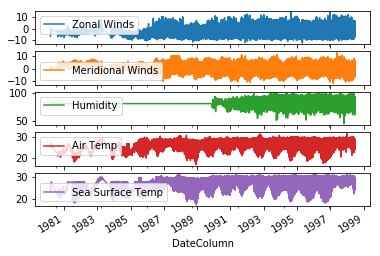

In [15]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html
columns=['Zonal Winds','Meridional Winds','Humidity','Air Temp','Sea Surface Temp']
plt.figure(figsize=(15, 20))
train_data[columns].plot(subplots=True, legend=True)
plt.show()